In [3]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [42]:
df = pd.read_csv("games.csv")
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [44]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

## Шаг 2.Подготовьте данные

### Замените названия столбцов (приведите к нижнему регистру);

In [45]:
df.rename(columns=lambda x: x.lower(), inplace=True)

In [ ]:
#print(re.findall('\d+', na))

In [46]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Проблемы:
Корректировка типов:
year_or_release - некорректный тип, должен быть целочисленный;
user_score - некорректный тип, должен быть с плавающей точкой.

### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

### Обработка пропусков:

In [47]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### Пропуски есть в 6 столбцах, рассмотрим их:

Рассмотрим пропуски в годах

In [48]:
df[df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


посмотрим частный случай пропуска года для какой-нибудь игры

In [27]:
df[df['name'] == 'Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


можем заполнить пропущенное значения в столбце года выпуска значением для той же игры, но на другой платформе. Для этого создадим список из всех пропущенных игр

In [28]:
lost_name = df[df['year_of_release'].isnull()]['name'].to_list()

Создадим словарь, в котором ключи будут имена, а значения - год выхода на другой платформе, для простоты возьмем максимальный год, скорее всего игра вышла в один год на всех платформах. 

In [29]:
dlost = {}
cnt_nan = 0
cnt_find = 0
for i in lost_name:
    if len(df[df['name'] == i]) > 1:
        cnt_find +=1
        val = df[df['name']==i]['year_of_release'].median()
        if pd.isna(val) == False:
#            print(val)
            dlost[i] = val
        else:
            cnt_nan +=1
#print(cnt_nan)
#print(cnt_find)
print('Кол-во найденых годов:', len(dlost))
#print(dlost)

Кол-во найденых годов: 99


создадим функцию, которую применим к столбцу года, которая заполнит пропущенные значения столбца согласно словарю

In [49]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [50]:
def fill_year(st):
#     print(st)
    if st in dlost:
#         print(dlost.get(st))
        return dlost.get(st)
    
    
df.loc[df['year_of_release'].isna(), 'year_of_release'] = df.loc[df['year_of_release'].isna(), 'name'].apply(fill_year) 

In [51]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Удалим оставшиеся NaN в столбце год их немного, большого влияния они на результат не окажут, а других вариантов как их заполнить найти не удалось

In [52]:
df = df.dropna(axis='index', how='any', subset=['year_of_release'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16569 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16569 non-null  object 
 2   year_of_release  16569 non-null  float64
 3   genre            16567 non-null  object 
 4   na_sales         16569 non-null  float64
 5   eu_sales         16569 non-null  float64
 6   jp_sales         16569 non-null  float64
 7   other_sales      16569 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Поменяем в столбце year_of_release тип на Int, т.к. год всегда целое число

In [53]:
df['year_of_release'] = df['year_of_release'].astype(np.int64, errors='ignore')

<ipython-input-53-6ea4cc20f8f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_of_release'] = df['year_of_release'].astype(np.int64, errors='ignore')


In [54]:
df['name'].value_counts()

Need for Speed: Most Wanted            12
Madden NFL 07                           9
FIFA 14                                 9
Ratatouille                             9
LEGO Marvel Super Heroes                9
                                       ..
Agatha Christie: Peril at End House     1
Sky Odyssey                             1
Mario Party Advance                     1
Uppers                                  1
Bugs Bunny: Lost in Time                1
Name: name, Length: 11426, dtype: int64

видим, что некоторые игры повторяются по несколько раз, посмотрим на самую часто повторяющуюся игру

In [55]:
df[df['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Дубли в наименовании обоснованы тем, что представляют разные варианты одной игры на разных платформ или в разные года, что несёт уникальную информацию

In [56]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Оказалось, что пропуски по жанрам и по имени принадлежать одним и тем же объектам, лучше удалить эти строки, т.к.они не несут практически никакой информации.

In [57]:
df = df.dropna(subset=['name', 'genre'])

In [58]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8492
user_score         6633
rating             6699
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Кооректировка и замена выполнены

#### Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;

In [60]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 13.])

In [61]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [62]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

'tbd' в столбце user_score, посмотрим частоту его распределения

In [63]:
df['user_score'].value_counts()

tbd    2394
7.8     324
8       288
8.2     279
8.3     253
       ... 
1.3       2
1.9       2
1.5       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

видим что значение tbd встречается очень часто, гугл сообщил, что "TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято." Вероятно это игры, по которым рейтинг не определен, тогда можем заменить это обозначение на Nan, чтобы адекватно вычислять среднюю оценку, т.к. вычисление среднего значения по умолчанию исключает NaN значения.

In [517]:
# df.loc[df['user_score'] == 'tbd', 'user_score'] = 0
# df['user_score'].fillna(0, inplace=True)

In [64]:
df.loc[df['user_score']=="tbd", 'user_score']=np.nan
df['user_score'] = df['user_score'].astype(float)

In [65]:
df['user_score'].isna().sum()

9027

In [66]:
df['user_score'].describe()

count    7540.000000
mean        7.125027
std         1.498254
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [67]:
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8492
user_score         9027
rating             6699
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           9868 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [69]:
df.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
year_of_release,1.000000,-0.092671,0.003914,-0.168242,0.037588,0.011476,-0.265415
na_sales,-0.092671,1.000000,0.765529,0.450286,0.638700,0.240298,0.086139
eu_sales,0.003914,0.765529,1.000000,0.435287,0.722693,0.220765,0.055370
jp_sales,-0.168242,0.450286,0.435287,1.000000,0.291221,0.152651,0.125950
other_sales,0.037588,0.638700,0.722693,0.291221,1.000000,0.198357,0.057196
critic_score,0.011476,0.240298,0.220765,0.152651,0.198357,1.000000,0.580087
user_score,-0.265415,0.086139,0.055370,0.125950,0.057196,0.580087,1.000000


Видно, что наибольшая корреляция для столбцов critic_score и user_score между собой (0,58) - и это вполне логично, оценки критиков и самих пользователей в целом должны быть схожи

In [70]:
df[['critic_score','user_score','na_sales','eu_sales','jp_sales','other_sales']].describe()

,critic_score,user_score,na_sales,eu_sales,jp_sales,other_sales
count,8075.000000,7540.000000,16567.000000,16567.000000,16567.000000,16567.000000
mean,68.991950,7.125027,0.263975,0.145814,0.078020,0.047567
std,13.923383,1.498254,0.816474,0.505364,0.310068,0.187476
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,6.400000,0.000000,0.000000,0.000000,0.000000
50%,71.000000,7.500000,0.080000,0.020000,0.000000,0.010000
75%,79.000000,8.200000,0.240000,0.110000,0.040000,0.030000
max,98.000000,9.700000,41.360000,28.960000,10.220000,10.570000


Столбец rating содержит данные рейтинга ESRB. Рейтинги ESRB дейтвительны в США и Канаде.
Кроме ESRB, существуют и другие рейтинговые системы оценки игр: PEGI в Европе, CERO в Японии. Значит данный рейтинг только для США и Канады, а в нашем датасете есть данные и с другой регионов, проверим, что для региона NA пропусков в рейтинги будет значительно меньше, чем для остальных


In [40]:
df[~df['rating'].isna()][['na_sales','eu_sales','jp_sales','other_sales']].sum()

na_sales       3144.12
eu_sales       1805.30
jp_sales        454.17
other_sales     637.83
dtype: float64

In [41]:
df[df['rating'].isna()][['na_sales','eu_sales','jp_sales','other_sales']].sum()

na_sales       1229.15
eu_sales        610.40
jp_sales        838.39
other_sales     150.22
dtype: float64

Видим, что сумма продаж по всем регионам кроме Америки в полтара раза больше, чем сумма продаж в Америке для тех игр, где рейтинг не указан, в целом, это подтверждает гипотезу, что данный рейтинг используется в основном для игры, характерных для региона NA

Много игр которые вышли на разных платформах. Проверим есть ли возрастной рейтинг для одних и тех же игр на других платформах. Составим словарь имя-рейтинг name_rating и заполним в соответствии с ним пропуски в столбце rating

In [71]:
name_dict = df.set_index("name")['rating'].dropna().to_dict()
# print(name_rating)
def ratio(st):
    if pd.isna(st['rating']):
        return name_dict.get(st['name'])
    return st['rating']

In [72]:
df['rating'] = df.apply(ratio, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           10305 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [73]:
df['sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,None,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,None,31.38


### ИТОГО:

В ходе предобработки в Столбце name удалено 2 строки.

Столбец year_of_release - Осталось 146 пропусков, их решил удалить, т.к. заполнить их нечем и их кол-во не повлияет на общий датасет, тип изменили на int

Столбец user_score вместо tbd заполнили Nan, тип данных изменили на float

Столбец rating - Удалось немного заполнить, но в целом большое кол-во пропусков

Оставшиеся пропуски адекватно заполнить не вижу возможности, если заполнять медианами или средними, то это может непредсказуемо отразиться на результатах будущего анализа данных.

Хоть данные довольно неполные, в данном случае лучше работать с меньшим количеством данных, чем с некорректно заполнеными

По заданию добавлен столбец sales с суммой всех продаж в регионах

## Шаг 3. Проведите исследовательский анализ данных


Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
Соотнесите выводы с продажами игр на других платформах.
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [74]:
year_release = df.groupby('year_of_release')['name'].count().reset_index()
year_release

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


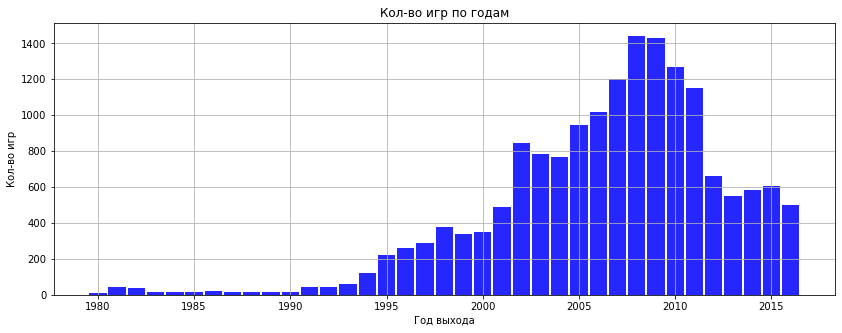

In [75]:
plt.figure(figsize=(14, 5))
plt.bar(year_release['year_of_release'], year_release['name'], label='Кол-во игр за год', color='b', alpha=0.85, width=0.9)
plt.xlabel('Год выхода')
plt.ylabel('Кол-во игр')
plt.grid()
plt.title(f'Кол-во игр по годам')
plt.show();

#### Вывод: Период до 1994 года характеризуется малой активностью. Хорошо видно, переломный момент в игростроении наступает в 1994 году - после него начинается активный рост. Пик приходится на 2008-2009 год, а в 2010 начинается стагнация и к 2012 кол-во игр падают в 2 раза относительно пика и до 2016 держатся примерно на одном уровне

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы? 

In [76]:
platform = df.groupby('platform')['sales'].sum().sort_values(ascending=False).reset_index()
platform

,platform,sales
0,PS2,1247.16
1,X360,966.61
2,PS3,935.19
3,Wii,903.31
4,DS,804.28
5,PS,727.58
6,PS4,314.14
7,GBA,313.73
8,PSP,293.57
9,PC,258.86


Возьмем топ 10 платформ с наибольшими объемами продаж. Построим по ним распределение продаж по годам

In [77]:
top_platforms = platform.loc[:9, 'platform'].values
top_platforms

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', 'PC'],
      dtype=object)

In [78]:
top_df = df.loc[df['platform'].isin(top_platforms)] 

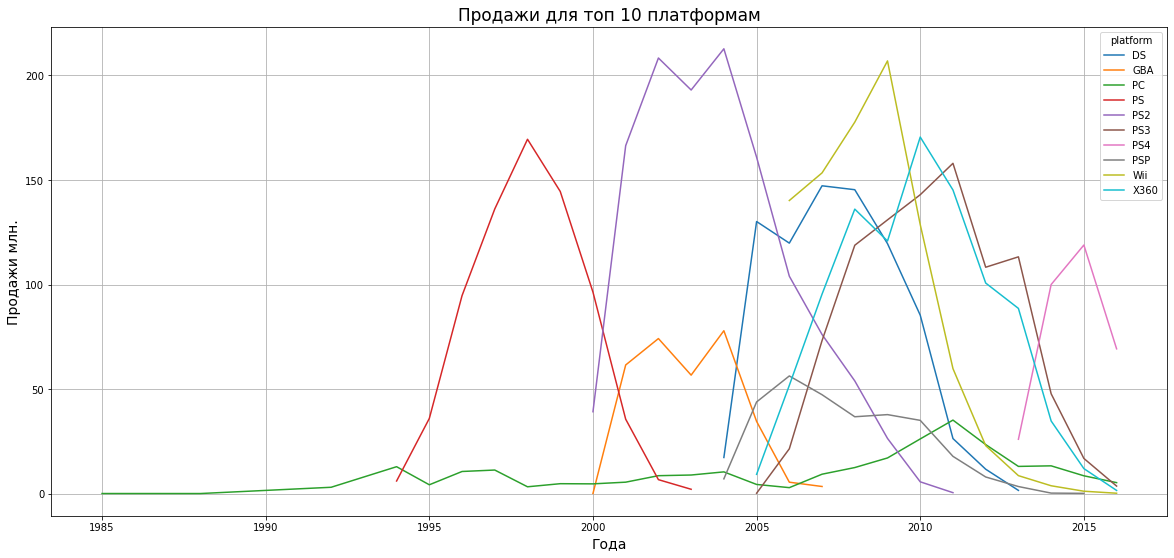

In [79]:
pd.pivot_table(top_df , index='year_of_release', columns='platform', values='sales', aggfunc='sum').plot(figsize=(20,9))
plt.grid(True)
plt.title('Продажи для топ 10 платформам', fontsize=17)
plt.xlabel('Года',fontsize=14)
plt.ylabel('Продажи млн.',fontsize=14)
plt.show()

In [80]:
all_sale_platform = pd.pivot_table(df, index='year_of_release', columns='platform', values='sales', aggfunc='sum')
display(all_sale_platform.head())

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


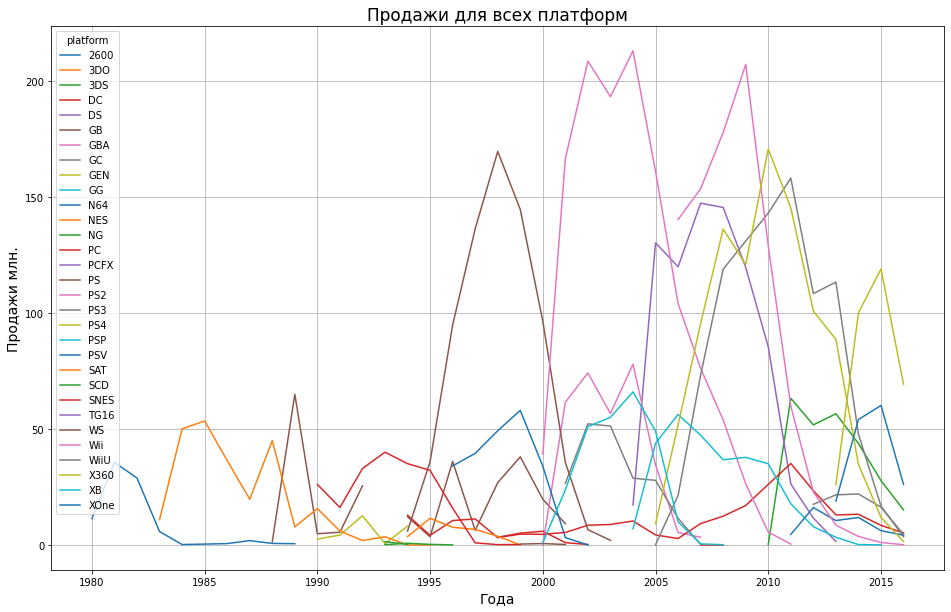

In [81]:
all_sale_platform.plot(figsize=(16,10))
plt.grid(True)
plt.xlabel('Года',fontsize=14)
plt.ylabel('Продажи млн.',fontsize=14)
plt.title('Продажи для всех платформ', fontsize=17)
plt.show()

In [82]:
all_life = df.groupby(['platform', 'year_of_release']).agg({'sales':'sum'}).reset_index()
all_life['platform'].value_counts().mean()

7.838709677419355

In [83]:
top_df_life = top_df.groupby(['platform', 'year_of_release']).agg({'sales':'sum'}).reset_index()
top_df_life['platform'].value_counts().mean()

11.8

### Вывод:
Расчетное значение 11,8 года, а из графика видно, что срок активного существования платформ 9-10 лет(если не обращать внимания на минимальные значения по краям), и распределение продаж похоже на нормальное распределение, Поэтому будем считтать,что средний срок  существования платформы - 10-11 лет. Можно выделить из списка платформ - "PC" , они хоть и не в топах по выручке, но вряд ли исчезнут. Срок жизни у более популярых платформ в полтара раза дольше, чем в среднем по платформам, что логично

#### 

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Как мы видели из предыдущих пунктов срок существования платформ 10-11 лет, поэтому для прогноза на 2017 год возьмем предыдущий период в 10 лет (с 2007 года)

возьмем данные за нужные нам года за актуальный период и выведем сводную таблицу по продажам и платформам

In [84]:
new_df = (df[df['year_of_release'] >= 2007])
pd.pivot_table(new_df, index='year_of_release', columns='platform', values='sales', aggfunc='sum')

platform,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,
2007,NaN,0.02,147.23,3.4,0.27,9.28,76.10,73.19,NaN,47.30,NaN,153.41,NaN,95.41,0.55,NaN
2008,NaN,0.04,145.36,NaN,NaN,12.46,53.90,118.79,NaN,36.76,NaN,177.68,NaN,136.07,0.18,NaN
2009,NaN,NaN,119.56,NaN,NaN,17.05,26.40,130.93,NaN,37.78,NaN,206.97,NaN,120.82,NaN,NaN
2010,0.30,NaN,85.35,NaN,NaN,26.15,5.64,142.96,NaN,35.04,NaN,128.67,NaN,170.55,NaN,NaN
2011,63.20,NaN,26.33,NaN,NaN,35.16,0.45,157.98,NaN,17.82,4.63,59.79,NaN,145.23,NaN,NaN
2012,51.76,NaN,11.67,NaN,NaN,23.45,NaN,108.28,NaN,7.95,16.19,22.94,17.56,100.72,NaN,NaN
2013,56.57,NaN,1.54,NaN,NaN,13.01,NaN,113.25,25.99,3.38,10.59,8.59,21.65,88.58,NaN,18.96
2014,43.76,NaN,NaN,NaN,NaN,13.28,NaN,47.76,100.00,0.24,11.90,3.75,22.03,34.74,NaN,54.07
2015,27.78,NaN,NaN,NaN,NaN,8.52,NaN,16.82,118.90,0.12,6.25,1.14,16.35,11.96,NaN,60.14


In [85]:
new_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,None,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01


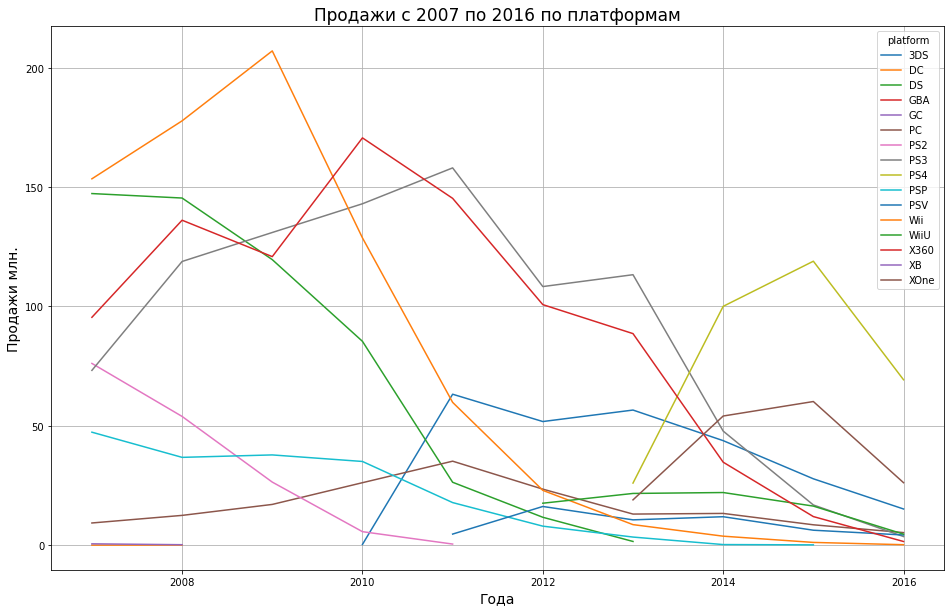

In [86]:
pd.pivot_table(new_df, index='year_of_release', columns='platform', values='sales', aggfunc='sum').plot(figsize=(16,10))
plt.grid(True)
plt.title('Продажи с 2007 по 2016 по платформам', fontsize=17)
plt.xlabel('Года',fontsize=14)
plt.ylabel('Продажи млн.',fontsize=14)
plt.show()

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [87]:
top_sales = new_df.groupby(['platform']).agg({'sales':'sum'}).sort_values(by='sales', ascending=False)
top_sales

,sales
platform,
PS3,913.56
X360,905.60
Wii,763.12
DS,537.04
PS4,314.14
3DS,258.51
PSP,186.39
PC,163.61
PS2,162.49


#### Какие платформы лидируют по продажам, растут или падают? 
Выберите несколько потенциально прибыльных платформ.

#### Вывод: 
Видно , что многие популярные платформы, такие как: Wii, PS3, X360, PSP, - заканчивают свой цикл жизни, другие платформы (PS2, DS, GBA, XB) закончилиь еще раньше, соответственно новые игры на этих платформах уже вряд ли появятся.
Но есть две платформы PS4 и XOne, которые появились в 2013 году и уже завоевали потребителя в 2014 и 2015 рост, а в 2016 был спад, их жизненный цикл в разгаре, поэтому будет логично предположить, что на эти платформы будет сделана ставка производителями.
Еще есть другие 3 платформы, которые появились пораньше PSV в 2011 / WiiU в 2012 / 3DS в 2011, у них меньше продаж, чем у верних двух, то тем не менее они будут существовать и под них будут производить новые игры.
Плюс не будем забывать про PC, т.к. они точно никуда не денутся и игры будут и под эту платформу:)

Создадим: список из потенциально прибыльных платформ top_2017 на 2017 год

In [88]:
top_2017 = ['PS4', 'XOne', 'WiiU', 'PSV', '3DS', 'PC']

In [89]:
new_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,None,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01


Рассмотрим топовые платформы и количественное распределение игр:

In [150]:
#new_df[(new_df['platform'].isin(top_2017))].pivot_table('name',['platform','year_of_release'], aggfunc='count')

name
platform year_of_release      
3DS      2010                1
         2011              116
         2012               94
         2013               91
         2014               80
         2015               86
         2016               46
PC       2007               62
         2008               77
         2009              108
         2010               92
         2011              141
         2012               63
         2013               41
         2014               47
         2015               50
         2016               54
PS4      2013               16
         2014               75
         2015              137
         2016              164
PSV      2011               18
         2012               53
         2013               63
         2014              100
         2015              110
         2016               85
WiiU     2012               32
         2013               42
         2014               31
         2015               28
         2016               14
XOne     2013               19
         2014               61
         2015               80
         2016               87

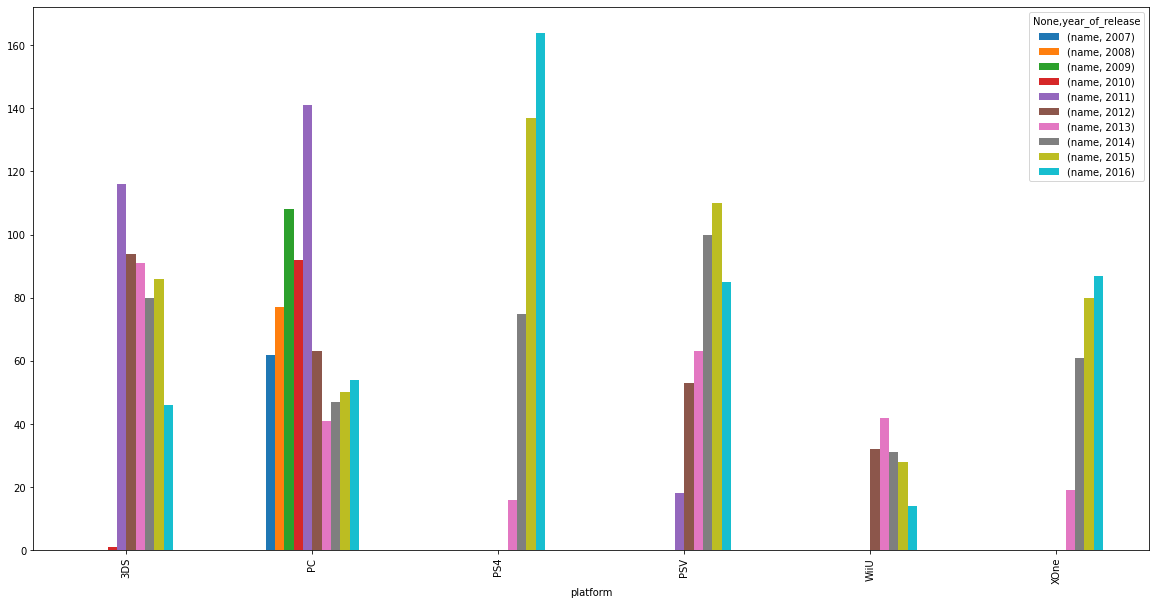

In [156]:
(new_df[(new_df['platform'].isin(top_2017))]
 .pivot_table('name',['platform','year_of_release'], aggfunc='count')
 .unstack()
 .plot(kind='bar', figsize = (20,10))
);

#### Вывод:
Количество игр растёт на платформах PS4, XOne, PC в отличии от 3DS, WiiU и PCV

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [97]:
top_sales.describe()

,sales
count,16.00000
mean,281.51500
std,321.03227
min,0.06000
25%,41.20750
50%,163.05000
75%,369.86500
max,913.56000


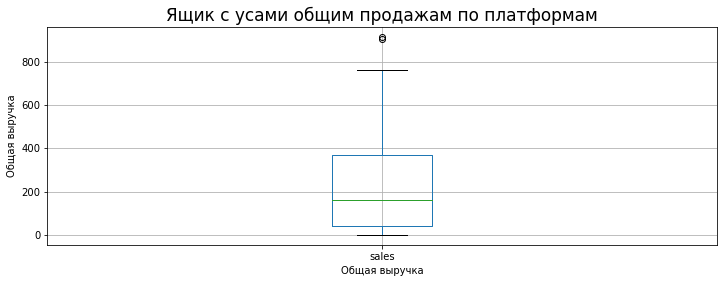

In [95]:
top_sales.boxplot('sales', figsize=(12,4))

plt.title('Ящик с усами общим продажам по платформам', fontsize=17)
plt.xlabel('Общая выручка')
plt.ylabel('Общая выручка')
plt.show()

In [107]:
df_sale_with_2008_sum = top_sales.groupby(['platform']).agg({'sales':'sum'}).reset_index()
display(df_sale_with_2008_sum.reset_index().sort_values(by='platform', ascending=False))

,index,platform,sales
15,15,XOne,159.32
14,14,XB,0.73
13,13,X360,905.60
12,12,WiiU,82.19
11,11,Wii,763.12
10,10,PSV,53.81
9,9,PSP,186.39
8,8,PS4,314.14
7,7,PS3,913.56
6,6,PS2,162.49


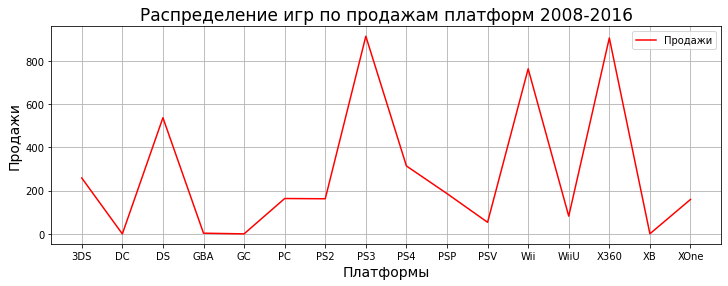

In [110]:
plt.figure(figsize=(12, 4))
plt.plot(df_sale_with_2008_sum['platform'], df_sale_with_2008_sum['sales'], '-r', label='steel price');
plt.title('Pаспределение игр по продажам платформ 2008-2016', fontsize=17)
plt.xlabel('Платформы',fontsize=14)
plt.ylabel('Продажи',fontsize=14)
plt.legend(['Продажи'])
plt.grid(True)
plt.show()


### Вывод:
Данные по глобальным продажам игр в разбивке по платформам , практически все самые прибыльные проекты с высокой выручкой являются выбросами на ящике с усами, первая тройка платформ лидирует с большим отрывом

#### Продажи внутри одной популярной платформы и отзывы и соотношение с другими платформами 

(Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.)

Выберем для примера самую популярную платформу "X360"

In [113]:
df_x360 = new_df.query('platform=="X360"')[['sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)
df_x360

,sales,critic_score,user_score
0,21.82,61.0,6.3
1,16.27,97.0,8.1
2,14.73,88.0,3.4
3,14.62,87.0,6.3
4,13.68,83.0,4.8
...,...,...,...
771,0.02,64.0,7.6
772,0.02,62.0,7.3
773,0.02,75.0,6.9
774,0.01,77.0,8.2


In [114]:
df_x360.corr()

,sales,critic_score,user_score
sales,1.000000,0.391385,0.107791
critic_score,0.391385,1.000000,0.620863
user_score,0.107791,0.620863,1.000000


Коэффициент Зависимости 0.391


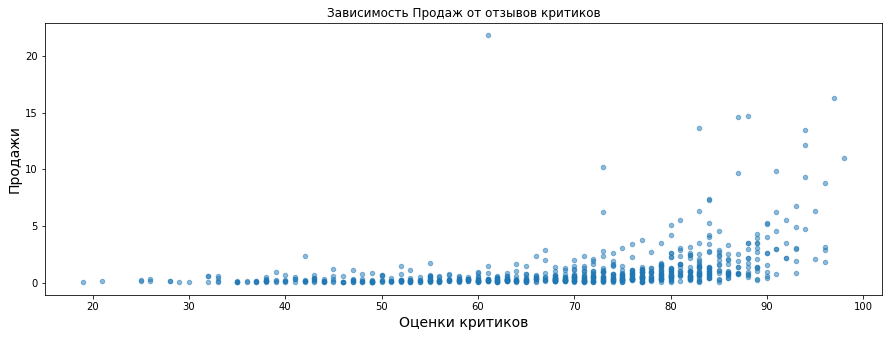

In [131]:
print('Коэффициент Зависимости' , round(df_x360['sales'].corr(df_x360['critic_score']),3))
df_x360.plot(x='critic_score',y='sales',kind='scatter',figsize=(15,5), alpha=0.5)
plt.xlabel('Оценки критиков',fontsize=14)
plt.ylabel('Продажи',fontsize=14)
plt.title('Зависимость Продаж от отзывов критиков');

Коэффициент Зависимости 0.108


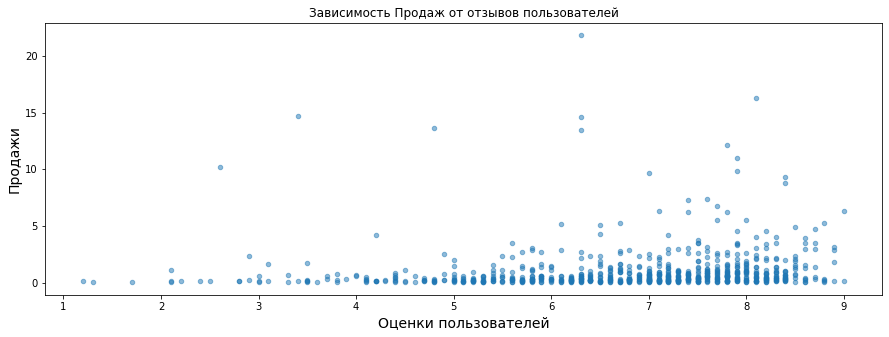

In [132]:
print('Коэффициент Зависимости' , round(df_x360['sales'].corr(df_x360['user_score']),3))
df_x360.plot(x='user_score',y='sales',kind='scatter',figsize=(15,5), alpha=0.5)
plt.xlabel('Оценки пользователей',fontsize=14)
plt.ylabel('Продажи',fontsize=14)
plt.title('Зависимость Продаж от отзывов пользователей');

Коэффициент Зависимости 0.621


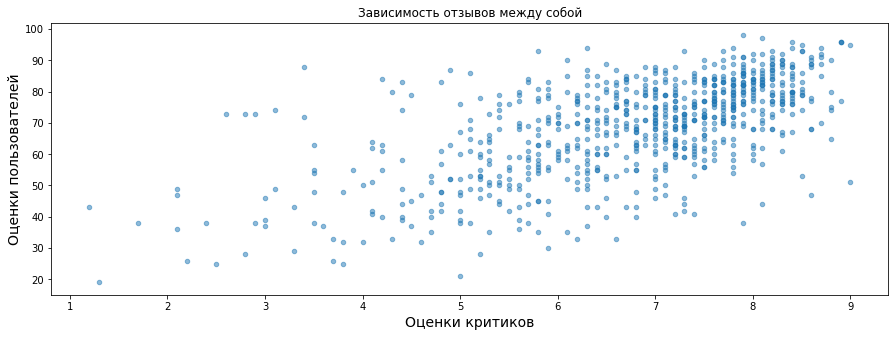

In [134]:
print('Коэффициент Зависимости' , round(df_x360['critic_score'].corr(df_x360['user_score']),3))
df_x360.plot(x='user_score',y='critic_score',kind='scatter',figsize=(15,5), alpha=0.5)
plt.xlabel('Оценки критиков',fontsize=14)
plt.ylabel('Оценки пользователей',fontsize=14)
plt.title('Зависимость отзывов между собой');

### Вывод: По платформе X360: 
Отзывы критиков немного влияют на продажи, хотя зависимость продаж от них находится на уровне средней на границе со слабой(коэффициент 0.391); зависимость здесь прямопропорцианальная - чем выше оценка, тем выше продажи. И зависимость продаж от отзывов пользователей совсем слабая(0.115). Самая сильная зависимость это зависимость оценок между собой(0.621)

Соотнесем выводы с продажами игр на других платформах.

In [159]:
new_df.query('platform=="PS3"')[['sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True).corr()

,sales,critic_score,user_score
sales,1.000000,0.428174,0.139701
critic_score,0.428174,1.000000,0.627411
user_score,0.139701,0.627411,1.000000


In [160]:
new_df.query('platform=="Wii"')[['sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True).corr()

,sales,critic_score,user_score
sales,1.000000,0.230260,0.139238
critic_score,0.230260,1.000000,0.679847
user_score,0.139238,0.679847,1.000000


In [161]:
new_df.query('platform=="PC"')[['sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True).corr()

,sales,critic_score,user_score
sales,1.000000,0.296804,-0.012656
critic_score,0.296804,1.000000,0.519705
user_score,-0.012656,0.519705,1.000000


### Вывод:
Данные на других платформах аналогичны.
видно что есть корреляция между рейтингом пользователей и критиков, между оценками и уровнем продаж корреляция очень слабая

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

#### Кол-во Игр в Жанрах

In [162]:
new_df['genre'].value_counts()

Action          2223
Misc            1155
Sports          1132
Adventure        953
Role-Playing     887
Shooter          676
Simulation       551
Racing           489
Fighting         360
Strategy         355
Puzzle           327
Platform         286
Name: genre, dtype: int64

#### Кол-во Продаж по Жанрам

In [168]:
new_df.groupby('genre')['sales'].sum().sort_values(ascending=False)

genre
Action          1066.12
Shooter          681.78
Sports           660.77
Misc             489.62
Role-Playing     465.08
Racing           265.27
Platform         230.45
Simulation       199.46
Fighting         166.23
Adventure        130.01
Puzzle            79.83
Strategy          69.62
Name: sales, dtype: float64

In [184]:
df_genre = (new_df.groupby(['genre']).agg({'sales':'sum', 'name':'count'})
                   .sort_values(by='sales', ascending=False))                 
df_genre = df_genre.rename(columns={'name':'name_cnt'})
df_genre = df_genre.reset_index()
df_genre

,genre,sales,name_cnt
0,Action,1066.12,2223
1,Shooter,681.78,676
2,Sports,660.77,1132
3,Misc,489.62,1155
4,Role-Playing,465.08,887
5,Racing,265.27,489
6,Platform,230.45,286
7,Simulation,199.46,551
8,Fighting,166.23,360
9,Adventure,130.01,953


добавим столбец сколько один релиз каждого жанра продавался

In [198]:
df_genre['price_for_one'] = (df_genre['sales']/df_genre['name_cnt'])
(df_genre)

,genre,sales,name_cnt,price_for_one
0,Action,1066.12,2223,0.479586
1,Shooter,681.78,676,1.008550
2,Sports,660.77,1132,0.583719
3,Misc,489.62,1155,0.423913
4,Role-Playing,465.08,887,0.524329
5,Racing,265.27,489,0.542474
6,Platform,230.45,286,0.805769
7,Simulation,199.46,551,0.361996
8,Fighting,166.23,360,0.461750
9,Adventure,130.01,953,0.136422


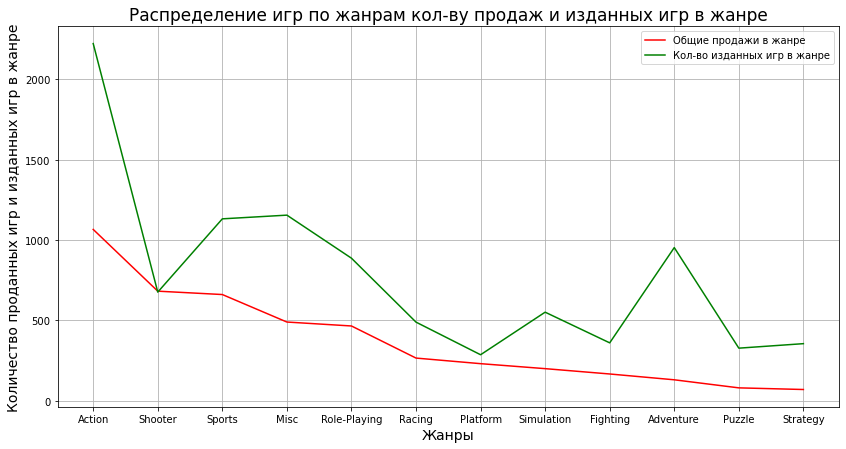

In [207]:
plt.figure(figsize=(14, 7))
plt.plot(df_genre['genre'], df_genre['sales'], '-r', label='steel price');
plt.plot(df_genre['genre'], df_genre['name_cnt'], '-g', label='steelad price');
plt.title('Pаспределение игр по жанрам кол-ву продаж и изданных игр в жанре', fontsize=17)
plt.xlabel('Жанры',fontsize=14)
plt.ylabel('Количество проданных игр и изданных игр в жанре',fontsize=14)
plt.legend([ 'Общие продажи в жанре', 'Кол-во изданных игр в жанре'])
plt.grid(True)
plt.show()

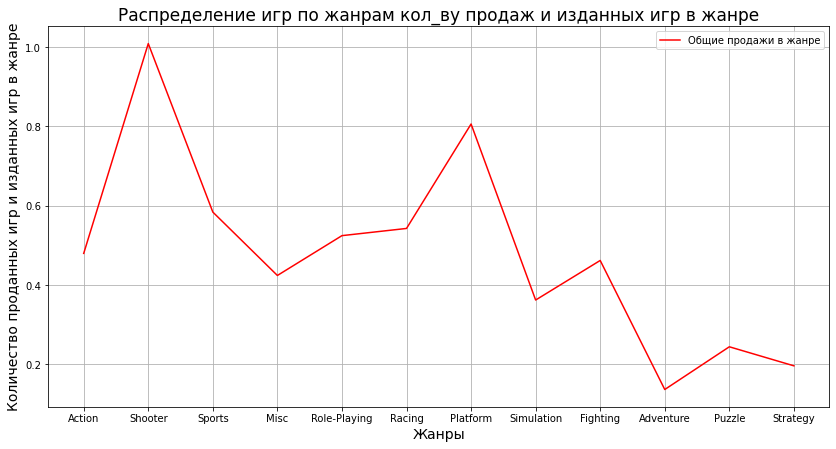

In [205]:
plt.figure(figsize=(14, 7))
plt.plot(df_genre['genre'], df_genre['price_for_one'], '-r', label='steel price');
plt.title('Pаспределение игр по жанрам кол_ву продаж и изданных игр в жанре', fontsize=17)
plt.xlabel('Жанры',fontsize=14)
plt.ylabel('Количество проданных игр и изданных игр в жанре',fontsize=14)
plt.legend([ 'Общие продажи в жанре', 'Кол-во изданных игр в жанре'])
plt.grid(True)
plt.show()

#### Вывод:
 Жанры которые более просты в освоеннии пользователями продаются лучше action, sports, shooter в отличие от adventure, strategy
 Так же из графика 'Сколько раз продалась каждая копия игры' видно, что есть жанры которые в рассчете на количество на одну копию опережают общих лидеров продаж, но заметим, что и здесь shooter в лидерах.

### В целом вывод: 
Игровая индустрия усложняется, технические характеристики растут игр растут, ресурсные потребности растут, цена игр растёт, количество платформ уменьшается

## Шаг 4. Составим портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Предполгаю, что тут не требуется работать только с актуальным периодом, а будем смотреть на все данные

In [208]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,None,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,None,31.38


In [221]:
df_user_na_platform = df.groupby(['platform']).agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False).head(5)
print('NA:')
print(df_user_na_platform)

df_user_eu_platform = df.groupby(['platform']).agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False).head(5)
print('EU:')
print(df_user_eu_platform)

df_user_jp_platform = df.groupby(['platform']).agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False).head(5)
print('JP:')
print(df_user_jp_platform)

NA:
   platform  na_sales
28     X360    599.15
16      PS2    580.09
26      Wii    494.01
17      PS3    391.60
4        DS    381.38
EU:
   platform  eu_sales
16      PS2    337.05
17      PS3    328.97
28     X360    269.79
26      Wii    261.48
15       PS    212.39
JP:
   platform  jp_sales
4        DS    175.02
15       PS    139.78
16      PS2    137.74
23     SNES    116.55
2       3DS    100.64


Запишем в словарь данные по продажам топ-5 платформ в 3 регионах {region:df}

In [232]:
region_sales = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    region_sales[region] = df.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
region_sales

{'na_sales': platform
 X360    599.15
 PS2     580.09
 Wii     494.01
 PS3     391.60
 DS      381.38
 Name: na_sales, dtype: float64,
 'eu_sales': platform
 PS2     337.05
 PS3     328.97
 X360    269.79
 Wii     261.48
 PS      212.39
 Name: eu_sales, dtype: float64,
 'jp_sales': platform
 DS      175.02
 PS      139.78
 PS2     137.74
 SNES    116.55
 3DS     100.64
 Name: jp_sales, dtype: float64}

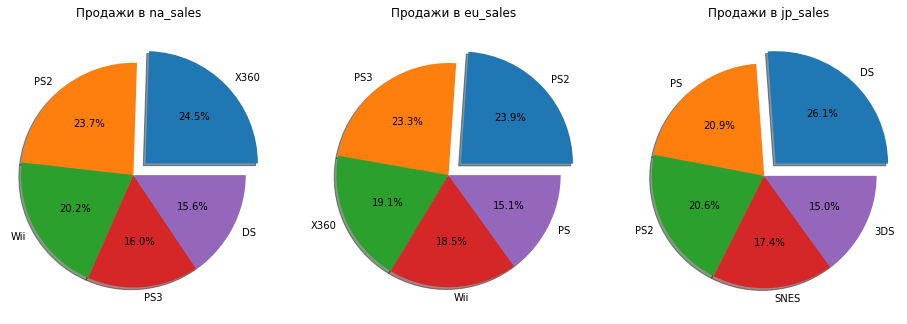

In [241]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.autofmt_xdate();

i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.15, 0, 0, 0, 0)

for i in range(len(region)):
    labels = region_sales[region[i]].index
    sizes = region_sales[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode) 
    ax.axis('equal')  

plt.show()

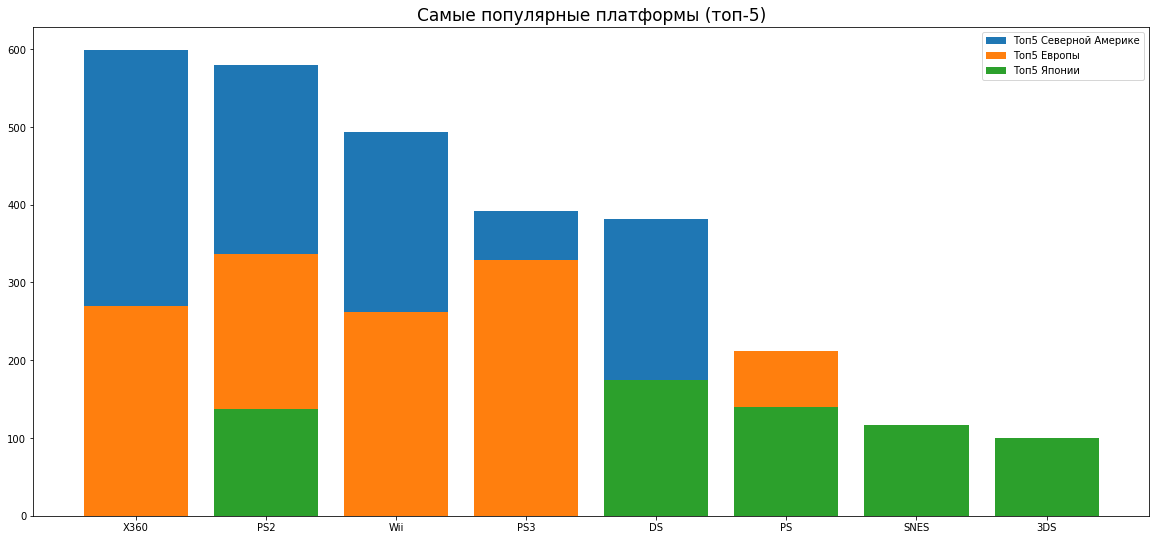

In [217]:
#fig, ax = plt.subplots()
plt.figure(figsize=(20, 9))
plt.bar(df_user_na_platform['platform'], df_user_na_platform['na_sales'])
plt.bar(df_user_eu_platform['platform'], df_user_eu_platform['eu_sales'])
plt.bar(df_user_jp_platform['platform'], df_user_jp_platform['jp_sales'])
plt.title('Самые популярные платформы (топ-5)', fontsize=17, color='black')
plt.legend([ 'Топ5 Северной Америке', 'Топ5 Европы', 'Топ5 Японии'])
plt.show()

### Вывод:
Лидеры продаж во всех регионах разные: Америка - X360, Европа - PS2 и Япония - DS. В Америке и Европе пользуются в основном одними и теми же 4 платформами - X360, PS2, Wii, PS3, исключение в Америке любят болше DS,а в Европе PS. В Японии совсем другая картина: тут более популярны платформы DS, SNES и 3DS. Надо отметить, что платформа PS2 очень популярна во всех регионах.

## Самые популярные жанры в регионах (топ-5) 

Запишем в словарь данные по продажам топ-5 платформ в 3 регионах {region:df} аналогично, как мы делали с продажами

In [242]:
region_genre = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    region_genre[region] = df.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
region_genre

{'na_sales': genre
 Action      873.70
 Sports      681.69
 Shooter     590.35
 Platform    444.44
 Misc        401.69
 Name: na_sales, dtype: float64,
 'eu_sales': genre
 Action     517.58
 Sports     375.60
 Shooter    316.96
 Racing     235.47
 Misc       211.32
 Name: eu_sales, dtype: float64,
 'jp_sales': genre
 Role-Playing    353.88
 Action          160.15
 Sports          135.27
 Platform        130.71
 Misc            108.04
 Name: jp_sales, dtype: float64}

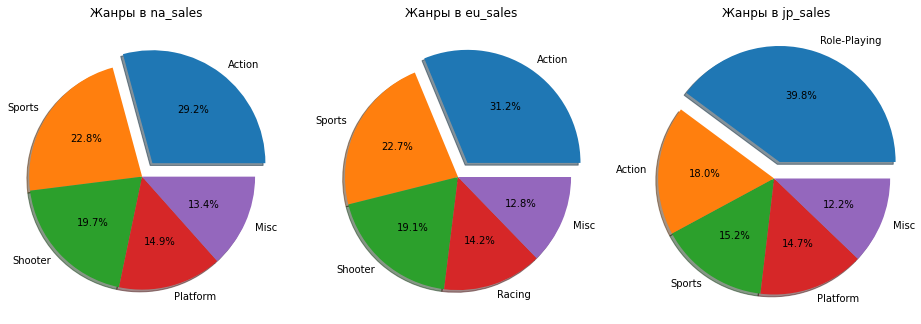

In [243]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.autofmt_xdate();

i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.15, 0, 0, 0, 0)

for i in range(len(region)):
    labels = region_genre[region[i]].index
    sizes = region_genre[region[i]].values
    ax = x[i]
    ax.set_title(f'Жанры в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode) 
    ax.axis('equal')  

plt.show()

### Вывод:
В Америке и Европе совпадают топ-3 жанра Action, Sports и Shoter, а также совпадает на 5 месте Misc(даже и в Японии тоже на 5 месте); различия на 4 месте в Америке Platform, а в Европе Racing. В Японии же лидирует жанр Role-Playing, хотя тоже очень популярны Action и Sports, присутствует жанр Platform как и в Америке на 4 месте

## Влияние рейтинга ESRB на продажи в отдельных регионах 

In [246]:
esrb_sale = df.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='na_sales',ascending=False).reset_index()
esrb_sale

<ipython-input-246-f1848383ec72>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  esrb_sale = df.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='na_sales',ascending=False).reset_index()


,rating,na_sales,eu_sales,jp_sales
0,E,1337.71,732.35,210.98
1,T,777.10,441.26,163.63
2,M,767.06,501.18,67.79
3,E10+,364.64,195.38,48.24
4,K-A,2.59,0.29,1.49
5,EC,2.04,0.11,0.00
6,AO,1.26,0.61,0.00
7,RP,0.00,0.18,0.01


Справка:
https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board
Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.
«E» («Everyone») — «Для всех»
«T» («Teen») — «Подросткам»
«M» («Mature») — «Для взрослых»
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
«EC»(«K-A» - в ранних версиях с 1994-1997 годы) («Early childhood») — «Для детей младшего возраста»
«AO» («Adults Only 18+») — «Только для взрослых»
«RP» («Rating Pending») — «Рейтинг ожидается»

### Вывод: 
Существует (по нашей таблице) 4 основных рейтинга: «E»,«T»,«M» и «E10+» (4 другие очень не популярны, поэтому учитывать их в анализе нет смысла).Влияние рейтинга на продажи в разных регионах почти одинаково. На первом месте «E» и далее «T»,«M» и «E10+», исключение Европа, где продажи с рейтингом «M» выше, чем с «T». Игры с рейтингом без ограничений продаются лучше всех во всех регионах

## Шаг 5. Проверьте гипотезы

#### Гипотеза №1
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Сформируем списки для обеих платформ

In [247]:
XOne = df.query(' platform == "XOne" ')['user_score'].dropna().to_list()
PC = df.query(' platform == "PC" ')['user_score'].dropna().to_list()

In [249]:
print(XOne)
print(PC)

[7.9, 5.4, 6.4, 6.2, 4.1, 5.5, 7.5, 4.4, 7.2, 6.4, 4.3, 5.5, 3.1, 6.1, 6.2, 8.2, 7.4, 5.9, 5.4, 6.9, 6.6, 7.9, 6.3, 7.5, 6.8, 5.8, 6.4, 6.6, 8.2, 6.1, 7.3, 8.0, 8.0, 6.2, 6.9, 9.2, 6.1, 7.8, 8.4, 5.9, 5.1, 5.2, 5.8, 7.7, 7.4, 5.6, 6.8, 6.2, 6.9, 5.7, 7.0, 6.4, 5.9, 7.7, 7.3, 7.4, 5.8, 7.8, 7.3, 6.7, 5.9, 5.1, 4.6, 5.1, 5.7, 8.0, 5.7, 6.8, 5.1, 7.5, 6.9, 7.8, 8.1, 6.0, 6.4, 6.3, 7.0, 7.8, 7.1, 6.0, 6.9, 3.2, 8.6, 7.7, 5.1, 6.6, 7.9, 6.1, 7.2, 5.5, 8.5, 7.0, 5.4, 4.3, 6.8, 5.5, 5.8, 5.3, 7.1, 5.5, 4.0, 6.2, 8.3, 6.8, 6.7, 6.8, 3.1, 7.3, 3.0, 7.0, 8.3, 7.0, 7.2, 4.4, 7.0, 6.9, 8.3, 7.5, 8.0, 7.2, 6.6, 7.3, 4.1, 7.9, 8.7, 5.7, 8.0, 2.1, 8.2, 5.6, 7.2, 6.2, 5.3, 7.5, 6.0, 3.1, 7.6, 8.5, 6.8, 6.3, 5.8, 7.7, 6.9, 8.4, 5.2, 4.9, 7.1, 7.1, 6.1, 8.1, 6.3, 6.0, 8.9, 7.7, 1.6, 8.0, 5.4, 8.1, 4.3, 7.4, 4.3, 7.1, 5.8, 4.2, 6.6, 7.3, 7.2, 7.1, 6.7, 8.8, 7.9, 8.1, 3.1, 7.5, 6.3, 8.2, 7.1, 6.8, 6.0, 8.2, 6.6, 6.7]
[7.6, 7.3, 4.0, 8.2, 9.1, 7.9, 8.1, 8.0, 7.8, 3.9, 6.6, 5.9, 7.5, 9.0, 9.1, 7.9, 8.3, 7.9

Расчитаем дисперсию

In [258]:
print('Дисперсия XOne =', round(np.var(XOne),3))
print('Дисперсия PC =', round(np.var(PC),3))
print(round(np.var(XOne),3)/round(np.var(PC),3))

Дисперсия XOne = 1.897
Дисперсия PC = 2.332
0.8134648370497428


In [264]:
print(sum(XOne)/len(XOne))
print(sum(PC)/len(PC))

6.52142857142857
7.067362924281998


Дисперсии отличаются (около 19%), поэтому возьмем equal_var=False

Возьмем стандартный уровень статистической значимости 5% alpha = 0.05

По заданию надо проверить гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Пусть H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; альтернативная гипотеза H1 тогда будет такая - Средние пользовательские рейтинги платформ Xbox One и PC различны.

In [273]:
from scipy import stats as st

alpha = 0.05
# критический уровень статистической значимости, если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(XOne, PC, equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 4.101854214173904e-06
Отвергаем нулевую гипотезу


### Вывод: 
Нулевая гипотеза отвергнута - это значит, что и Гипотеза №1 отвергнута, а Средние пользовательские рейтинги платформ Xbox One и PC различны

#### Гипотеза №2. Средние пользовательские рейтинги жанров Action и Sports разные

сформируем списки для сравниваемых жанров

In [270]:
Action = df.query('genre  == "Action"')['user_score'].dropna().to_list()
Sports = df.query('genre  == "Sports"')['user_score'].dropna().to_list()

In [274]:
print('Дисперсия Action =', round(np.var(Action),3))
print('Дисперсия Sports =', round(np.var(Sports),3))
print(round(np.var(Action),3)/round(np.var(Sports),3))

Дисперсия Action = 2.024
Дисперсия Sports = 2.599
0.7787610619469026


In [275]:
print(sum(Action)/len(Action))
print(sum(Sports)/len(Sports))

7.05648351648351
6.9563752276867055


Дисперсии отличаются (около 22%), поэтому возьмем equal_var=False

Возьмем стандартный уровень статистической значимости 5% alpha = 0.05

По заданию надо проверить гипотезу: Средние пользовательские рейтинги жанров Action и Sports  одинаковые.

Пусть H0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые; альтернативная гипотеза H1 тогда будет такая - Средние пользовательские рейтинги жанров Action и Sports различны.

In [281]:
results = st.ttest_ind(Action, Sports, equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.08991887133875968
Не получилось отвергнуть нулевую гипотезу


### Вывод: 
Не получилось отвергнуть нулевую гипотезу - это значит, что Гипотеза №2 отвергнута, а Средние пользовательские рейтинги жанров Action и Sports одинаковые

# Общий вывод по заданию:

### В ходе предобработки:

В Столбце name удалено 2 строки.

Столбец year_of_release - Осталось 146 пропусков, их решил удалить, т.к. заполнить их нечем и их кол-во не повлияет на общий датасет, тип изменили на int

Столбец user_score вместо tbd заполнили Nan, тип данных изменили на float

Столбец rating - Удалось немного заполнить, но в целом большое кол-во пропусков.

Оставшиеся пропуски адекватно заполнить не вижу возможности, если заполнять медианами или средними, то это может непредсказуемо отразиться на результатах будущего анализа данных.

Хоть данные довольно неполные, в данном случае лучше работать с меньшим количеством данных, чем с некорректно заполнеными.

По заданию добавлен столбец sales с суммой всех продаж в регионах

### В ходе анализа было выявлено:

Период до 1994 года характеризуется малой активностью. Хорошо видно, что важный период в релизах игр наступает в 1994 году - и после него начинается бум - компьютерные игры захватывают мир. В 2010 наступает переломный момент и уже в 2012 релизы падают в 2 раза и до 2016 держатся примерно на одном уровне

Срок активного существования платформ 10-11 лет. Можно выделить из списка платформ - "PC" (компьютеры, наверное), они хоть и не в топах по выручке, но актуальны во все времена. Также надо отметить,что платформа "DS" просуществовала очень долго - до 2013 года.

Выручка всех платформ падает. Думаю связано с большим разнообразием на рынка
Данные по глобальным продажам игр в разбивке по платформам очень разбросанные, практически все самые прибыльные проекты с высокой выручкой находяться вне пределов усов в зоне выбросов.

### В ходе анализа было выявлено:

Лидеры продаж во всех регионах разные: Америка - X360, Европа - PS2 и Япония - DS. В Америке и Европе пользуются в основном одними и теми же 4 платформами - X360, PS2, Wii, PS3. В Японии совсем другая картина: тут более популярны платформы DS, SNES и 3DS. Надо отметить, что платформа PS2 очень популярна во всех регионах.

В Америке и Европе совпадают топ-3 жанра Action, Sports и Shoter, а также совпадает на 5 месте Misc(даже и в Японии тоже на 5 месте); различия на 4 месте в Америке Platform, а в Европе Racing. В Японии же лидирует жанр Role-Playing, хотя тоже очень популярны Action и Sports.

Влияние рейтинга ESRB на продажи в разных регионах почти одинаково. На первом месте «E» и далее «T»,«M» и «E10+»

### В ходе проверки гипотез:


Средние пользовательские рейтинги платформ Xbox One и PC разные

Средние пользовательские рейтинги жанров Action и Sports одинаковые